# Assignment 2

# Table of contents
1. [Introduction](#introduction)

2. [What are key factors that are playing into current attrition rates?](#question1)

    2.1 [Age](#age1)
    
    2.1 [DistanceFromHome](#distancefromhome1)
    
    2.1 [MonthlyIncome](#monthlyincome1)

3. [What are key factors that are playing into current satisfaction rates?](#question2)

    2.1 [Age](#age2)
    
    2.1 [DistanceFromHome](#distancefromhome2)
    
    2.1 [MonthlyIncome](#monthlyincome2)    

4. [When are employees leaving?](#question3)

## 1. Introduction <a name="introduction"></a>
This project use dataset from https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset which contains employee data with various information about the employees

#### Import Python libraries

In [164]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind

#### Import data

In [165]:
url = "D:\Hoang\SauDaiHoc\Kaggle\WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(url)

#### Data description

In [166]:
# Shape of data
print("Shape of dataframe is: {}".format(data.shape))

Shape of dataframe is: (1470, 35)


In [167]:
# Dataset columns
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [168]:
# Dataset header
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [169]:
# Columns datatypes and missign values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

There is no missing data

In [170]:
# Dataset describtion
perc = [.25, .5, .75] # percentile list
data.describe(percentiles = perc, include = None, exclude = None)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Data visualisation

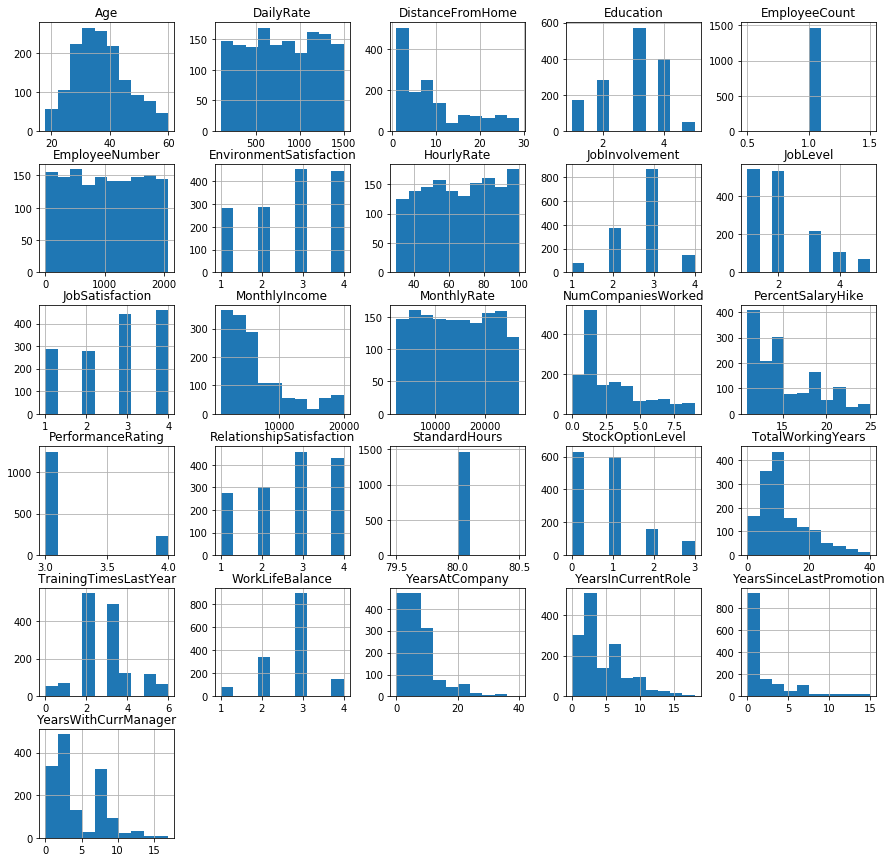

In [171]:
data.hist(figsize=(15,15))
plt.show()

#### Age distribution seem normal. Mean of age is about 36
#### There are a large number of employees whose distance from home is less than 10 km
#### There are a large number of employees whose monthly income is less than 6000
#### Most employees work at 1 company
#### PerformanceRating focuses on 3
#### Most employees have YearsAtCompany less than 10
#### YearsInCurrentRols of most employee ranges from 0 to 3
#### YearsSinceLastPromotion of most employee focus on 1
#### YearsWithCurrManager of most employee is in range (0,4) and (6,8)
#### StandardHours is 80
#### There are relatively even distributions in DailyRate, EmployeeNumber, HourlyRate and MonthlyRate

## 2. What are key factors that are playing into current attrition rates? <a name="question1"></a>

I choose Age,DistanceFromHome and MonthlyIncome and use independent t-test to test whether they affect the Attrition rate.

### 1.1 Age<a name="age1"></a>

In [172]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [173]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    data[data['Attrition'] == 'No'].shape[0] / data.shape[0]*100,
    data[data['Attrition'] == 'Yes'].shape[0] / data.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


93.4873684772739

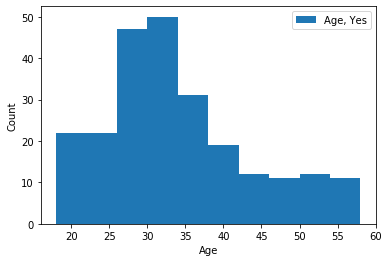

In [174]:
plt.hist(data.Age[data.Attrition == 'Yes'], label=['Age, Yes'])
plt.legend(loc='upper right')
plt.xlabel("Age")
plt.ylabel("Count")
np.var(data.Age[data.Attrition == 'Yes'])

78.93887017534185

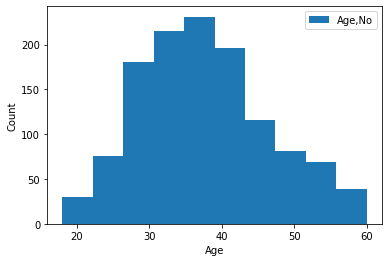

In [175]:
plt.hist(data.Age[data.Attrition == 'No'], label=['Age,No'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(loc='upper right')
np.var(data.Age[data.Attrition == 'No'])

#### Check equal variance

Null hypothesis: the variances are equal

In [176]:
scipy.stats.levene(data.Age[data.Attrition == 'Yes'],data.Age[data.Attrition == 'No'])

LeveneResult(statistic=0.48784929772776303, pvalue=0.4849988830829256)

pvalue>0.05. The variances are equal

#### t-test
Null hypothesis H0: There is no significant difference in Age between 2 attrition status

In [177]:
ttest_ind(data.Age[data.Attrition == 'Yes'],data.Age[data.Attrition == 'No'],equal_var=True,nan_policy='omit')

Ttest_indResult(statistic=-6.1786638353072165, pvalue=8.356308021103649e-10)

pvalue<0.05. Reject H0. There is difference in Age between 2 attrition status

### 1.2 DistanceFromHome <a name="distancefromhome1"></a>

71.14372696683215

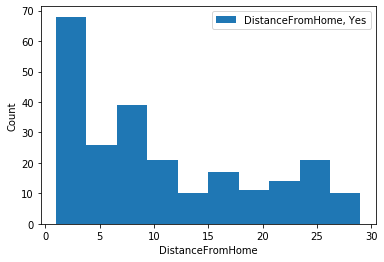

In [178]:
plt.hist(data.DistanceFromHome[data.Attrition == 'Yes'], label =['DistanceFromHome, Yes'])
plt.xlabel("DistanceFromHome")
plt.ylabel("Count")
plt.legend(loc='upper right')
np.var(data.DistanceFromHome[data.Attrition == 'Yes'])

64.1502253847788

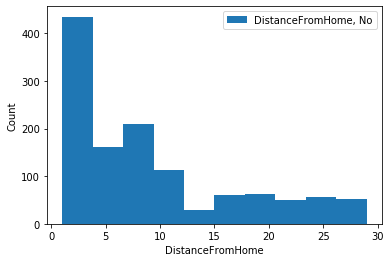

In [179]:
plt.hist(data.DistanceFromHome[data.Attrition == 'No'], label=['DistanceFromHome, No'])
plt.xlabel("DistanceFromHome")
plt.ylabel("Count")
plt.legend(loc='upper right')
np.var(data.DistanceFromHome[data.Attrition == 'No'])

#### Check equal variance

Null hypothesis: the variances are equal

In [180]:
scipy.stats.levene(data.DistanceFromHome[data.Attrition == 'Yes'],data.DistanceFromHome[data.Attrition == 'No'])

LeveneResult(statistic=3.9135257992111065, pvalue=0.04808570812266364)

pvalue<0.05. The variances are unequal

#### t-test
Null hypothesis H0: There is no significant difference in DistanceFromHome between 2 attrition status

In [181]:
ttest_ind(data.DistanceFromHome[data.Attrition == 'Yes'],data.DistanceFromHome[data.Attrition == 'No'],equal_var=False,nan_policy='omit')

Ttest_indResult(statistic=2.888183062817627, pvalue=0.004136511971511406)

pvalue<0.05. Reject H0. There is difference in DistanceFromHome between 2 attrition status

### 1.3 MonthlyIncome<a name="monthlyincome1"></a>

13195219.56944221

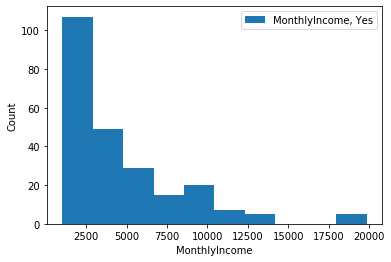

In [182]:
plt.hist(data.MonthlyIncome[data.Attrition == 'Yes'], label=['MonthlyIncome, Yes'])
plt.xlabel("MonthlyIncome")
plt.ylabel("Count")
plt.legend(loc='upper right')
np.var(data.MonthlyIncome[data.Attrition == 'Yes'])
#scipy.stats.normaltest(data.MonthlyIncome[data.Attrition == 'Yes'])

23196300.17309871

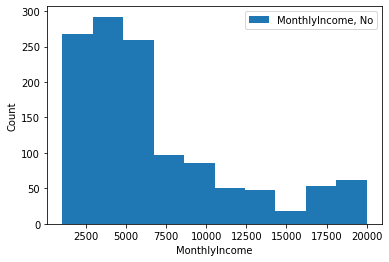

In [183]:
plt.hist(data.MonthlyIncome[data.Attrition == 'No'], label=['MonthlyIncome, No'])
plt.xlabel("MonthlyIncome")
plt.ylabel("Count")
plt.legend(loc='upper right')
np.var(data.MonthlyIncome[data.Attrition == 'No'])

#### Check equal variance

Null hypothesis: the variances are equal

In [184]:
scipy.stats.levene(data.MonthlyIncome[data.Attrition == 'Yes'],data.MonthlyIncome[data.Attrition == 'No'])

LeveneResult(statistic=14.899586974568717, pvalue=0.00011830973427184532)

pvalue<0.05. The variances are unequal

#### t-test
Null hypothesis H0: There is no significant difference in MonthlyIncome between 2 attrition status

In [185]:
ttest_ind(data.Age[data.Attrition == 'Yes'],data.Age[data.Attrition == 'No'],equal_var=False,nan_policy='omit')

Ttest_indResult(statistic=-5.828011853988949, pvalue=1.3797600649439775e-08)

pvalue<0.05. Reject H0. There is difference in MonthlyIncome between 2 attrition status

### Answer: Age, DistanceFromHome and MonthlyIncome affect Attrition rate

## 3. What are key factors that are playing into current satisfaction rates?<a name="question2"></a>

I choose Age,DistanceFromHome and MonthlyIncome and test whether they affect the RelationshipSatisfaction.

There is 4 samples but I can't use ANOVA test on DistanceFromHome and MonthlyIncome because they don't have standard distribution. I check whether Age is a normal distribution.

In [186]:
#Select employees with level 1 satisfaction.
Employee1 = data.loc[data['RelationshipSatisfaction'] == 1]
#Check whether Age in this sample normal distribution.
Employee1.Age
scipy.stats.normaltest(Employee1.Age)

NormaltestResult(statistic=10.648371568692294, pvalue=0.004872316516001734)

pvalue>0.05. Age is not normal distribution

I combine 1,2 into one group and 3.4 into one group. Then use independent t-test.

In [187]:
#Select employees with level 1,2 and 3,4 satisfaction.
data12 = data.loc[(data.RelationshipSatisfaction == 1) | (data.RelationshipSatisfaction == 2)]
data34 = data.loc[(data.RelationshipSatisfaction == 3) | (data.RelationshipSatisfaction == 4)]

### 3.1 Age<a name="age2"></a>

#### Check equal variance
Null hypothesis: the variances are equal

In [188]:
scipy.stats.levene(data12.Age,data34.Age)

LeveneResult(statistic=2.8426816793840533, pvalue=0.09200340420111233)

pvalue>0.05. The variances are equal

#### t-test
Null hypothesis H0: There is no significant difference in Age between 2 group

In [189]:
ttest_ind(data12.Age,data34.Age,equal_var=True,nan_policy='omit')

Ttest_indResult(statistic=-1.571952048044925, pvalue=0.11617716305857058)

pvalue>0.05.  Fail to reject H0

### 3.2 DistanceFromHome<a name="distancefromhome2"></a>

#### Check equal variance
Null hypothesis: the variances are equal

In [190]:
scipy.stats.levene(data12.DistanceFromHome,data34.DistanceFromHome)

LeveneResult(statistic=0.22669526503515236, pvalue=0.6340559908904573)

pvalue>0.05. The variances are equal

#### t-test
Null hypothesis H0: There is no significant difference in DistanceFromHome between 2 group

In [191]:
ttest_ind(data12.DistanceFromHome,data34.DistanceFromHome,equal_var=True,nan_policy='omit')

Ttest_indResult(statistic=0.34580142182994295, pvalue=0.7295415048131592)

pvalue>0.05.  Fail to reject H0

### 3.3 MonthlyIncome<a name="monthlyincome2"></a>

#### Check equal variance

Null hypothesis: the variances are equal

In [192]:
scipy.stats.levene(data12.MonthlyIncome,data34.MonthlyIncome)

LeveneResult(statistic=2.4052829059145515, pvalue=0.12114180713006693)

pvalue>0.05. The variances are equal

#### t-test
Null hypothesis H0: There is no significant difference in Age between 2 group

In [193]:
ttest_ind(data12.MonthlyIncome,data34.MonthlyIncome,equal_var=True,nan_policy='omit')

Ttest_indResult(statistic=-0.6942377214166153, pvalue=0.48764298689637686)

pvalue>0.05.  Fail to reject H0

### Answer: There is no conclusions about whether Age,DistanceFromHome and MonthlyIncome affects satisfaction.

## 4. When are employees leaving?<a name="question3"></a>

I find medians of Age, DistanceFromHome and MonthlyIncome in  all employees, Yes Attrition and No Attrition. Then compare these medians to assume when an employee leaves

In [194]:
EmployeeStaying = data.loc[data['Attrition'] == "Yes"]
EmployeeLeaving = data.loc[data['Attrition'] == "No"]

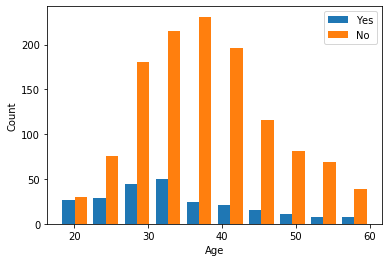

In [195]:
plt.hist([EmployeeStaying.Age, EmployeeLeaving.Age], label=['Yes', 'No'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()

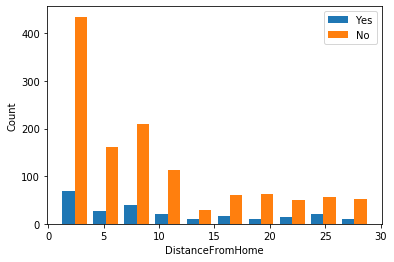

In [196]:
plt.hist([EmployeeStaying.DistanceFromHome, EmployeeLeaving.DistanceFromHome], label=['Yes', 'No'])
plt.xlabel("DistanceFromHome")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()

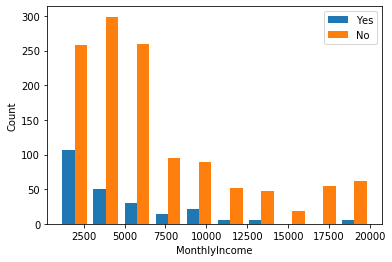

In [197]:
plt.hist([EmployeeStaying.MonthlyIncome, EmployeeLeaving.MonthlyIncome], label=['Yes', 'No'])
plt.xlabel("MonthlyIncome")
plt.ylabel("Count")
plt.legend(loc='upper right')
plt.show()

In [198]:
#Select datas with 'Yes' and 'No' Attrition
attritionYes = data.loc[data['Attrition'] == 'Yes']
attritionNo = data.loc[data['Attrition'] == 'No']

In [199]:
#Median of all employee
print("All employees:")
print("Median of Age is: {}".format(np.median(data.Age)))
print("Median of DistanceFromHome is: {}".format(np.median(data.DistanceFromHome)))
print("Median of MonthlyIncome is: {}".format(np.median(data.MonthlyIncome)))
#Median of 'Yes' employee
print("Yes Attrition:")
print("Median of Age is: {}".format(np.median(attritionYes.Age)))
print("Median of DistanceFromHome is: {}".format(np.median(attritionYes.DistanceFromHome)))
print("Median of MonthlyIncome is: {}".format(np.median(attritionYes.MonthlyIncome)))
#Median of 'No' employee
print("No Attrition:")
print("Median of Age is: {}".format(np.median(attritionNo.Age)))
print("Median of DistanceFromHome is: {}".format(np.median(attritionNo.DistanceFromHome)))
print("Median of MonthlyIncome is: {}".format(np.median(attritionNo.MonthlyIncome)))

All employees:
Median of Age is: 36.0
Median of DistanceFromHome is: 7.0
Median of MonthlyIncome is: 4919.0
Yes Attrition:
Median of Age is: 32.0
Median of DistanceFromHome is: 9.0
Median of MonthlyIncome is: 3202.0
No Attrition:
Median of Age is: 36.0
Median of DistanceFromHome is: 7.0
Median of MonthlyIncome is: 5204.0


There is difference between medians in Yes Attrition and No Attrition. The difference is enough to distinguish whether employees are in Yes Attrition or No Attrition

### Answer: Employee leaves company when Age is 32, DistanceFromHome is 9 and MonthlyIncome is 3202